# **ANÁLISE EXPLORATÓRIA NA  BASE DE DADOS RISK CREDIT**

Este trabalho tem como objetivo atender fazer uma análise de dados de exploratória na base de dados de risco de crédito que pode ser encontrada no site Kaggle. 

## **SOBRE OS DADOS**

A ideia básica deste dataset é simular dados obtidos pela Bureau Data que é uma agência de crédito ou uma agência geradora de relatórios de crédito que coleta e armazena informações sobre a saúde financeira das pessoas em relação a suas finanças. 

Estes relatórios, servem de subsídio para instituições financeiras avaliarem a possibilidade de fornecimento ou não de empréstimos ou financiamentos para seus clientes. 


---

### **Descrição das Colunas contidas no Dataset**

- **person_age** - Idade do cliente
- **person_income** - Renda anual do cliente
- **personhomeownership** - Bens pessoais
- **personemplength** - Tempo de trabalho
- **loan_intent** - Intenção de Empréstimo
- **loan_grade** - Grau de empréstimo
- **loanintrate** - Taxa de Juros
- **loan_status** - Status do empréstimo (0 não é padrão 1 é padrão). Se a pesseo pagou ou não
- **loanpercentincome** - Percentual da renda comprometida com o emprestimo
- **cbpersondefaultonfile** - Padrão histórico
- **cbpresoncredhistlength** - Tamanho do histórico de cŕedito


---

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import warnings
warnings.filterwarnings('ignore')

## **1.IMPORTANDO OS DADOS**

### **1.1.Análise inicial dos dados**

A ideia central nesta primeira verificação dos dados é conhecer de forma bastante generalizada a base e verificar se foi importada de forma correta. 

Para isso, utilizo os métodos e Tail, Head para verificar tantos os primeiros cinco registros da base, quando os cinco últimos

Depois passo para os métodos shape,  info e isnull para verificar o tamanho do Data Frame, o Schema dos dados e por último a quantidade de dados nulos ou faltantes. 

De cara já conseguimos identificar que a base possui dados faltantes.


In [69]:
# Importando os dados
df = pd.read_csv('credit_risk_dataset.csv')

In [70]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [71]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [72]:
df.shape

(32581, 12)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [74]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

---

### **1.2.Verificando a distribuição dos Dados**

Esta abordagem de gerar os BoxPlots e os gráficos de densidade nos dá uma boa visão geral de como os dados estão distribuídos na base e também contribuem para identificar de forma muito rápida dados em formato “supeito”.

Olhando para o gŕafico da idade (Age) pode-se observar que existem registros de pessoas com 140 anos por exemplo, algo que é no mínimo estranho. Os outros campos também possuem vários registros de valores muito fora da base. 

Estes registros podem estar contribuindo para que a densidade dos dados não fique tão bem distribuída.

De posse destas informações. O ideal é verificar todos os registros, mas para isso irei criar uma função que retornará exatamente os dados que quero verificar. 


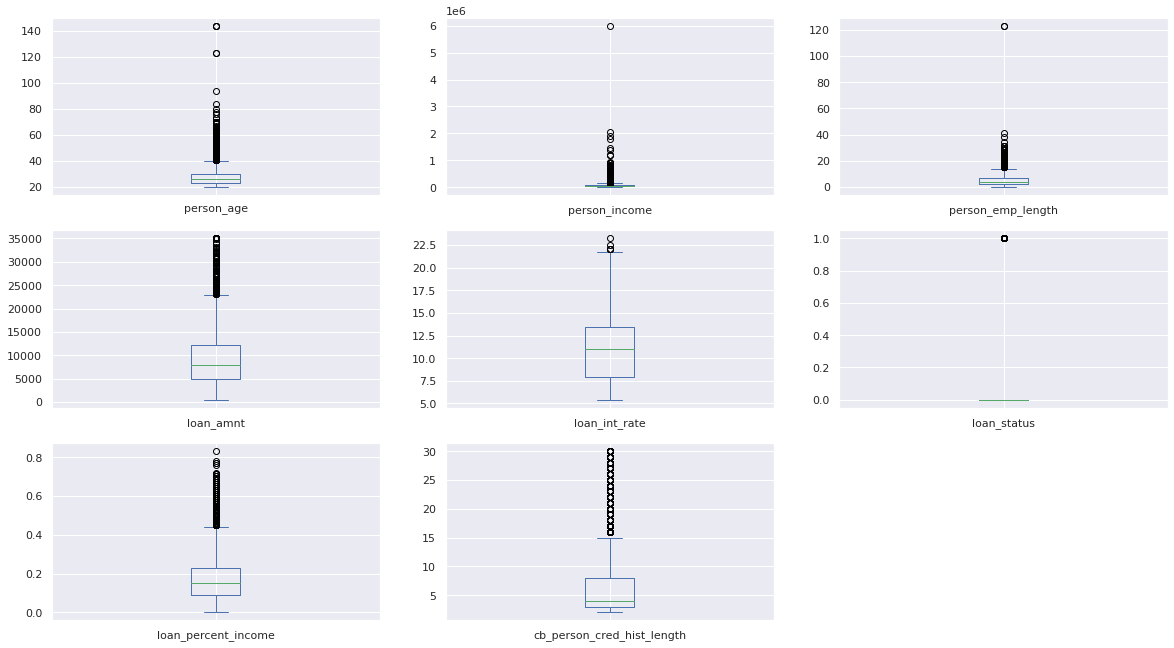

In [75]:
df.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (20,15));

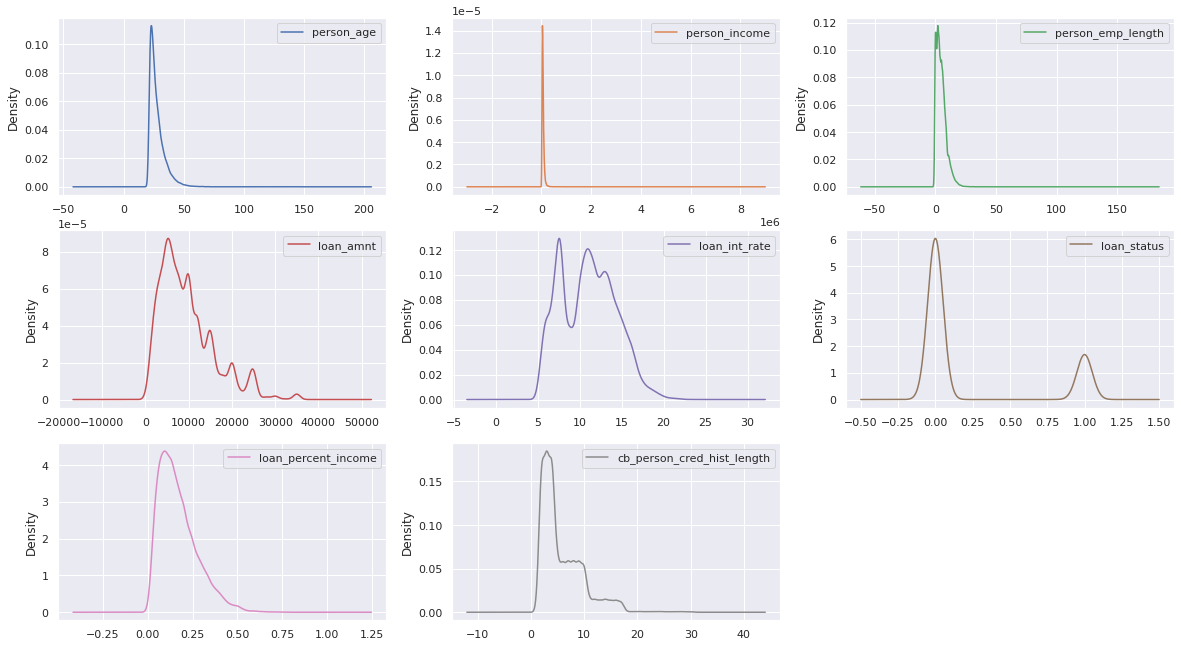

In [76]:
df.plot(kind = 'density', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (20,15));

---

### **1.3.Verificando os dados forma individual**

Enfim, como já vimos que podem ter inconsistência nos dados da base e ideia aqui é verificar feature por feature para tentar entender melhor o que temos em mãos. 

Um ponto que vale ressaltar é que gosto de fazer isso antes do tratamento dos dados faltantes para que eu consiga identificar a melhor forma de tratá-los.

Conforme o coeficiente de variação dos dados, pode ser melhor aplicar uma média para preencher os dados faltantes ou uma mediana. 

Veja que na célula abaixo criei duas listas. A primeira chamada stringData armazena apenas as colunas que possuem dados categóricos. Na segunda lista chamada numericData estão armazenadas as variáveis quantitativas.

É importante termos noção desta diferença entre os tipos de dados porque a forma de abordagem de cada um é diferente. No primeiro tipo nós conseguimos analisar frequências e por consequência as porcentagens.

Já no tipo de dados quantitativos, podemos trabalhar com todas as medidas de centralidade e operadores matemáticos. 


In [146]:
# Criando uma função para verificar os dados
stringData = df.select_dtypes('object').columns # Armazenando nome das colunas que possuem dados Categóricos
numericData = df.select_dtypes('number').columns # Armazenando nome das colunas que possuem dados Quantitativos

def categoricos(x):
    percent = df[x].value_counts(normalize= True)
    quant = df[x].value_counts()
    faltantes = df[x].isnull().sum()

    dfTempo = pd.DataFrame({
        'Itens':percent.index, 
        'Quantidade':quant.values,
        'Percentual': percent.values *100,
        'Faltantes': faltantes
    })

    print(f'Dados da variável {x}')
    display(round(dfTempo, 2))

    imagem = sns.barplot(data = dfTempo, y= 'Quantidade', x = 'Itens')
    imagem.figure.set_size_inches(15,5)
    imagem.set_title(x.upper(), fontsize = 30)
    
    for i in imagem.patches:
        imagem.annotate(i.get_height(),
                    (i.get_x() + i.get_width() / 2, i.get_height()),
                    ha='center',
                    va='baseline',
                    fontsize=14,
                    color='black',
                    xytext=(0, 1),
                    textcoords='offset points')
        

### **1.4.Pessoas com casa Própria**

Podemos observar que a maior parte das pessoas não possui casa própria. Existe uma grande quantidade de imóveis alugados e hipotecados. Apenas uma pequena quantidade de pessoas possui casa própria. 

Dados da variável person_home_ownership


,Itens,Quantidade,Percentual,Faltantes
0,RENT,16446,50.48,0
1,MORTGAGE,13444,41.26,0
2,OWN,2584,7.93,0
3,OTHER,107,0.33,0


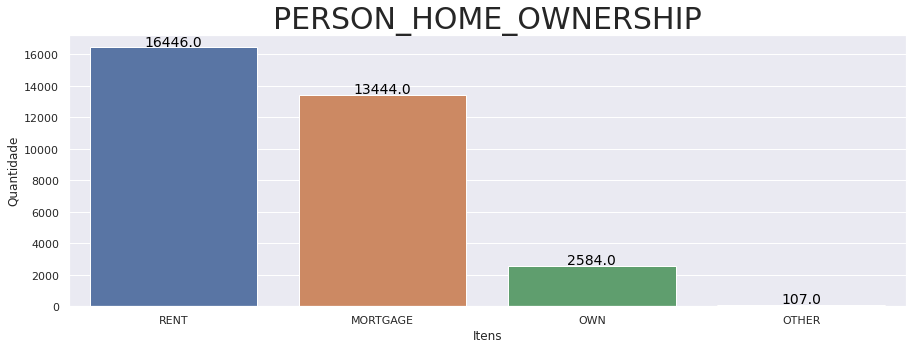

In [147]:
categoricos('person_home_ownership')

### **1.5.Motivo do Empréstimo**

Os principais motivadores para solicitações de empréstimos são educação e médico.

Dados da variável loan_intent


,Itens,Quantidade,Percentual,Faltantes
0,EDUCATION,6453,19.81,0
1,MEDICAL,6071,18.63,0
2,VENTURE,5719,17.55,0
3,PERSONAL,5521,16.95,0
4,DEBTCONSOLIDATION,5212,16.00,0
5,HOMEIMPROVEMENT,3605,11.06,0


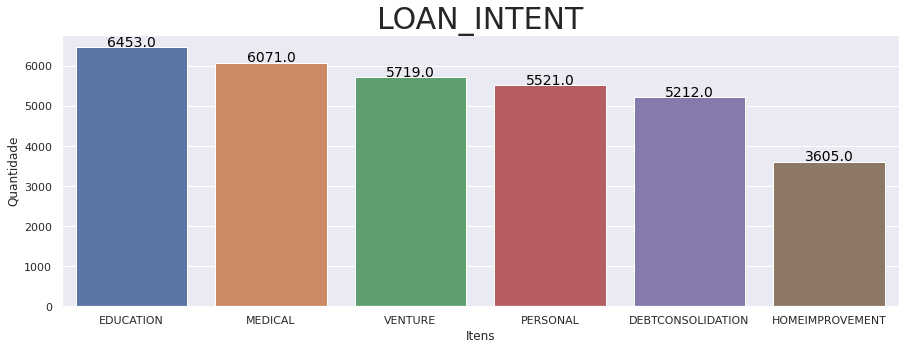

In [148]:
categoricos('loan_intent')

### **1.6.Classificação de Crédito**

A imensa maioria das pessoas da base de dados possui uma boa classificação de crédito. Note que a maioria tem classificação A.

Dados da variável loan_grade


,Itens,Quantidade,Percentual,Faltantes
0,A,10777,33.08,0
1,B,10451,32.08,0
2,C,6458,19.82,0
3,D,3626,11.13,0
4,E,964,2.96,0
5,F,241,0.74,0
6,G,64,0.20,0


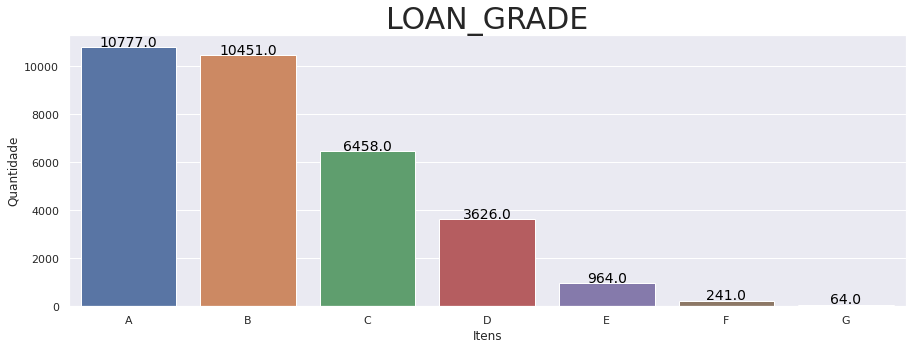

In [149]:
categoricos('loan_grade')

### **1.7.Pessoas que pagam seus Empréstimos**

A quantidade de pessoas que pagam seus empréstimos é a grande maioria da base, o que vai diretamente ao encontro da informação de classificação de crédito. 

Dados da variável cb_person_default_on_file


,Itens,Quantidade,Percentual,Faltantes
0,N,26836,82.37,0
1,Y,5745,17.63,0


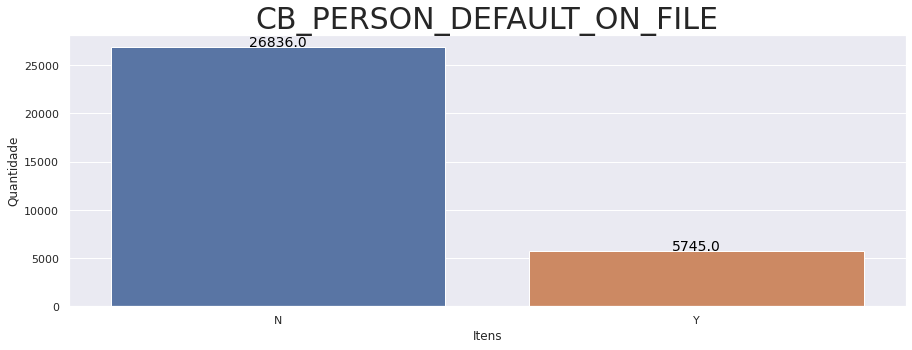

In [150]:
categoricos('cb_person_default_on_file')